# FUNCTION gradstat


The gradstat function extracts some relevant statistics from the image gradient computed in the [gradimg](gradimg.ipynb) function.

<ul> <strong> g = gradstat(f, mask[]) </strong>
       <ul> <li> <strong> Output </strong> </li>
           <ul> <li><strong>g: </strong> gradient statistics</li>
           </ul>
       </ul>
       <ul> <li> <strong> Input </strong> </li>
           <ul> <li><strong>f: </strong> ndarray, input image (2D or 3D)</li>
                <li><strong>mask: </strong> define the mask </li>
           </ul>
       </ul>
</ul>



In [1]:
import nbimporter
from auxiliary_functions import *
from scipy.stats import *
import numpy as np

def gradstat(f,mask=[]):
    grad = gradimg(f)
    b = iasecross(1)
    
    if (len(f.shape) == 3):                                                     # 3D Case
        if mask != []:
            for i in arange(mask.shape[0]):
                mask_aux = np.zeros(mask.shape[1]+2, mask.shape[2]+2)
                mask_aux[1:-1,1:-1] = mask[i]                                  # zero bounder
                mask[i] = iaero(mask_aux,b)[1:-1,1:-1]                         # extract the outside border
            grad = grad[mask>0]
        else:
            m = grad>-1 # all pixels
            for i in np.arange(m.shape[0]):
                m_aux = np.zeros((m.shape[1]+2,m.shape[2]+2))
                m_aux[1:-1,1:-1] = m[i]                                        # zero bounder
                m[i] = iaero(m_aux,b)[1:-1,1:-1]                               # extract the outside border
            grad = grad[mask>0]
    else:                                                                      # 2D Case
        if mask!=[]:
            mask_aux = np.zeros((mask.shape[0]+2,mask.shape[1]+2))
            mask_aux[1:-1,1:-1] = mask                                         # zero bounder
            mask = iaero(mask_aux,b)[1:-1,1:-1]                                # extract the outside border
            grad = grad[mask>0]
        else:
            m = grad>-1                                                        # all pixels
            m_aux = np.zeros((m.shape[0]+2,m.shape[1]+2))
            m_aux[1:-1,1:-1] = m                                               # zero bounder
            m = iaero(m_aux,b)[1:-1,1:-1]                                      # extract the outside border
            grad = grad[m>0]
    M = size(grad)
    percNonZeros = 1.0*count_nonzero(grad)/M
    return grad,[mean(grad), var(grad), skew(np.ravel(grad)), kurtosis(np.ravel(grad)), percNonZeros]

Importing Jupyter notebook from auxiliary_functions.ipynb


# EXAMPLES

Numerical example:

In [3]:
import nbimporter
import numpy as np
from gradimg import *
from auxiliary_functions import *

f = np.array( [[2,2,0,1,1,1,0,0,0],
               [1,2,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1],
               [0,0,2,2,2,1,1,0,0]], dtype=np.uint8)

g = gradimg(f)
print 'First step: gradient using masks above:\n',g
grad,stats = gradstat(f)
print 'Second step: gradient - external contour pixels\n', grad


First step: gradient using masks above:
[[ 2.23606798  2.82842712  1.41421356  1.41421356  1.          1.41421356
   1.41421356  1.          1.        ]
 [ 2.23606798  1.          1.41421356  0.          0.          0.          1.
   1.          1.41421356]
 [ 1.41421356  2.          1.          1.          1.          0.          0.
   1.          1.41421356]
 [ 1.          2.23606798  2.23606798  1.          1.41421356  1.41421356
   1.41421356  1.41421356  1.        ]]


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Numerical example:

In [4]:
import nbimporter
import numpy as np
from gradimg import *
from auxiliary_functions import *

f = np.array( [[0,0,0,1,1,1,0,0,0],
               [1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1],
               [0,0,0,1,1,1,1,0,0]], dtype=np.uint8)

g = gradimg(f)
print 'gradient[f]=',g
print 'g: ', g[f>0]
print
gstat = gradstat(f,f>0)
print 'mean absolute gradient',gstat[0]
print 'variance absolute gradient',gstat[1]
print 'skewness absolute gradient',gstat[2]
print 'kurtosis absolute gradient',gstat[3]
print 'percentage of pixels with nonzero gradient',gstat[4]

print 

print 'g: ', g
gstat = gradstat(f)
print 'mean absolute gradient',gstat[0]
print 'variance absolute gradient',gstat[1]
print 'skewness absolute gradient',gstat[2]
print 'kurtosis absolute gradient',gstat[3]
print 'percentage of pixels with nonzero gradient',gstat[4]

gradient[f]= [[ 1.          1.          1.41421356  1.41421356  1.          1.41421356
   1.41421356  1.          1.        ]
 [ 1.41421356  1.          1.          0.          0.          0.          1.
   1.          1.41421356]
 [ 1.41421356  1.          1.          0.          0.          0.          0.
   1.          1.41421356]
 [ 1.          1.          1.41421356  1.41421356  1.          1.
   1.41421356  1.41421356  1.        ]]
g:  [ 1.41421356  1.          1.41421356  1.41421356  1.          1.          0.
  0.          0.          1.          1.          1.41421356  1.41421356
  1.          1.          0.          0.          0.          0.          1.
  1.41421356  1.41421356  1.          1.          1.41421356]



/home/lburini/Documents/IC/lib/python2.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Numerical example 2:

In [5]:
import nbimporter 
from histstat import *
from histogram import *

f = np.array( [[0,0,0,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [0,0,0,1,1],
               [1,1,1,1,1]], dtype=np.uint8)
g = gradimg(f)
h = hist(f)
print histstat(f, h)
print
print 'gradient[f]=',g
gstat = gradstat(f)
print 'mean absolute gradient',gstat[0]
print 'variance absolute gradient',gstat[1]
print 'skewness absolute gradient',gstat[2]
print 'kurtosis absolute gradient',gstat[3]
print 'percentage of pixels with nonzero gradient',gstat[4]

Importing Jupyter notebook from histstat.ipynb
Importing Jupyter notebook from histogram.ipynb
[ 0.76        0.1824     -1.21756156 -0.51754386  0.          0.          1.
  1.          1.          0.23933097  1.          1.        ]

gradient[f]= [[ 1.          1.          1.41421356  1.41421356  1.41421356]
 [ 1.41421356  1.          1.          0.          1.        ]
 [ 1.41421356  1.          1.          0.          1.        ]
 [ 0.          0.          1.          1.          1.        ]
 [ 1.          0.          0.          1.          1.41421356]]


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Image Example

('f shape: ', (256, 256))


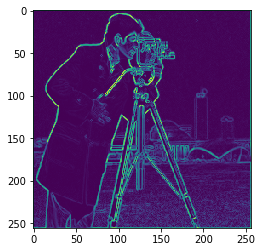

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

f = plt.imread('cameraman.png', 'gray')
print ('f shape: ', f.shape)
plt.imshow(ianormalize(f), 'gray')
g = gradimg(f)
plt.imshow(ianormalize(g))

3D Example

In [7]:
f = np.array( [[[0,0,0,1,1],
            [1,1,1,1,1],
            [1,1,1,1,1],
            [0,0,0,1,1]],
            [[0,0,0,1,1],
            [1,1,1,1,1],
            [1,1,1,1,1],
            [0,0,0,1,1]]], dtype=np.uint8)
print 'input image: \n',f
g = gradimg(f)
print 'gradient[f]=',g
gstat = gradstat(f)
m = g>-1 # all pixels
for i in arange(m.shape[0]):
    m[i] = m[i] - ia.iacontour(m[i]) # extract the outside border
    grad = g[m]
print grad
print 'mean absolute gradient',gstat[0]
print 'variance absolute gradient',gstat[1]
print 'skewness absolute gradient',gstat[2]
print 'kurtosis absolute gradient',gstat[3]
print 'percentage of pixels with nonzero gradient',gstat[4]

input image: 
[[[0 0 0 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [0 0 0 1 1]]

 [[0 0 0 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [0 0 0 1 1]]]
gradient[f]= [[[ 1.          1.          1.41421356  1.73205081  1.73205081]
  [ 1.73205081  1.41421356  1.41421356  1.          1.41421356]
  [ 1.73205081  1.41421356  1.41421356  1.          1.41421356]
  [ 1.          1.          1.41421356  1.73205081  1.73205081]]

 [[ 1.          1.          1.41421356  1.73205081  1.73205081]
  [ 1.73205081  1.41421356  1.41421356  1.          1.41421356]
  [ 1.73205081  1.41421356  1.41421356  1.          1.41421356]
  [ 1.          1.          1.41421356  1.73205081  1.73205081]]]


TypeError: ialimits() takes exactly 1 argument (2 given)

# EQUATIONS

Let $G(i,j)$ be the gradient matrix computed with 3x3 neighbor

<strong>Mean absolute gradient</strong>
$$ GrMean = \frac{1}{M} \sum\limits_{i, j  \in  ROI} G(i,j)$$

<strong>Variance of absolute gradient</strong>
$$ GrVariance = \frac{1}{M} \sum\limits_{i, j  \in  ROI} {(G(i,j)- GrMean)^2}$$ 

<strong>Skewness of absolute gradient</strong>
$$ GrSkewness = \frac{1}{GrVariance^{1.5}} \frac{1}{M} \sum\limits_{i, j  \in  ROI} {(G(i,j)- GrMean)^3}$$ 

<strong>Kurtosis of absolute gradient</strong>
$$ GrSKurtosis = \frac{1}{GrVariance^2}\frac{1}{M} \sum\limits_{i, j  \in  ROI} (G(i,j) - GrMean)^4 - 3$$